In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
dataset.shape

(374, 13)

In [ ]:
dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
dataset.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].fillna('None')
dataset['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset['Age'].min(), dataset['Age'].max()

(27, 59)

In [ ]:
dataset['Age'].max()

59

In [ ]:
df = dataset.drop(columns=['Occupation', 'Person ID', 'Gender', 'Age', 'Daily Steps', 'Sleep Disorder'])

In [ ]:
df['Quality of Sleep'].value_counts().reset_index().sort_values(by='Quality of Sleep')

,Quality of Sleep,count
5,4,5
4,5,7
1,6,105
2,7,77
0,8,109
3,9,71


In [ ]:
df['Quality of Sleep'] = df['Quality of Sleep'].apply(lambda x: 'Bad quality' if x <= 6 else 'Good quality')

In [ ]:
df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate
0,6.1,Bad quality,42,6,Overweight,126/83,77
1,6.2,Bad quality,60,8,Normal,125/80,75
2,6.2,Bad quality,60,8,Normal,125/80,75
3,5.9,Bad quality,30,8,Obese,140/90,85
4,5.9,Bad quality,30,8,Obese,140/90,85
...,...,...,...,...,...,...,...
369,8.1,Good quality,75,3,Overweight,140/95,68
370,8.0,Good quality,75,3,Overweight,140/95,68
371,8.1,Good quality,75,3,Overweight,140/95,68
372,8.1,Good quality,75,3,Overweight,140/95,68


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

Text(0.5, 1.0, 'Boa Qualidade de Sono x Má Qualidade de Sono')

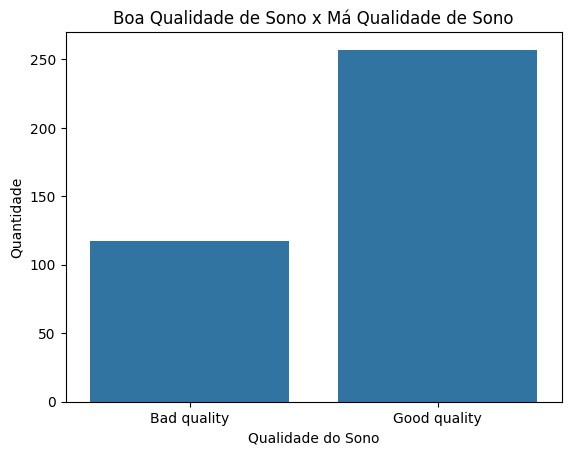

In [ ]:
bar_graph = sns.countplot(x=df['Quality of Sleep'], data=df)

bar_graph.set_xlabel('Qualidade do Sono')
bar_graph.set_ylabel('Quantidade')
bar_graph.set_title('Boa Qualidade de Sono x Má Qualidade de Sono')

Text(0.5, 1.0, 'Quality of Sleep x Stress Level')

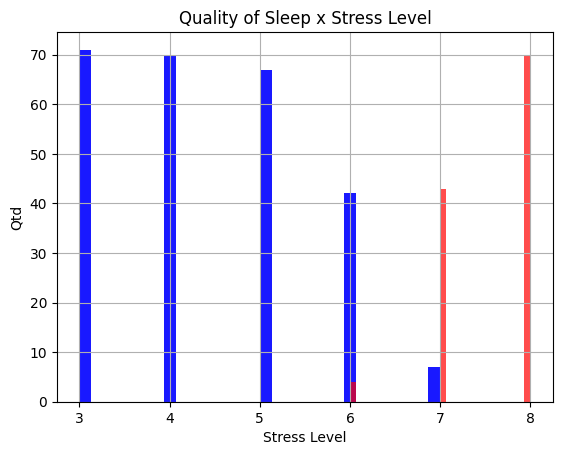

In [ ]:
df[df['Quality of Sleep'] == 'Good quality']['Stress Level'].hist(alpha=0.9, color='blue', bins= 30)
df[df['Quality of Sleep'] == 'Bad quality']['Stress Level'].hist(alpha=0.7, color='red', bins=30)

plt.xlabel("Stress Level")
plt.ylabel("Qtd")
plt.title('Quality of Sleep x Stress Level')

Text(0.5, 1.0, 'Sleep Quality x Sleep Duration')

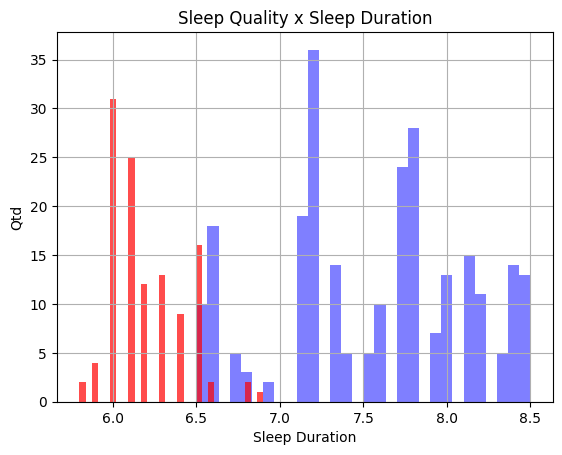

In [ ]:
df[df['Quality of Sleep'] == 'Good quality']['Sleep Duration'].hist(alpha=0.5, color='blue', bins=30)
df[df['Quality of Sleep'] == 'Bad quality']['Sleep Duration'].hist(alpha=0.7, color='red', bins=30)

plt.xlabel('Sleep Duration')
plt.ylabel('Qtd')
plt.title('Sleep Quality x Sleep Duration')

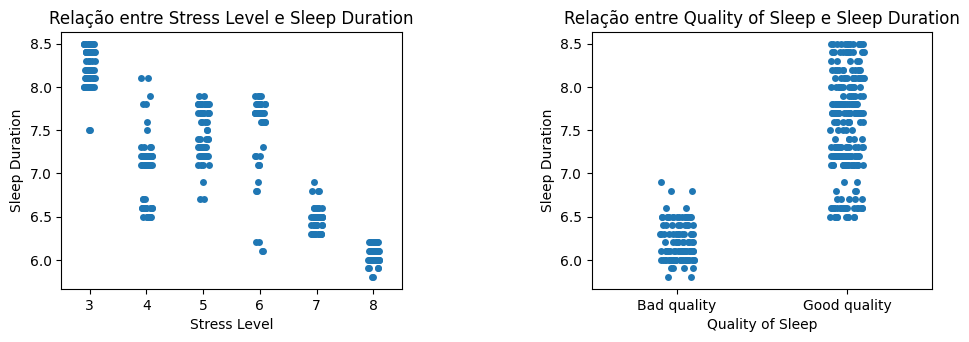

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.stripplot(x='Stress Level', y='Sleep Duration', data=df, ax=axes[0])
axes[0].set_title('Relação entre Stress Level e Sleep Duration')

sns.stripplot(x='Quality of Sleep', y='Sleep Duration', data=df, ax=axes[1])
axes[1].set_title('Relação entre Quality of Sleep e Sleep Duration')

plt.tight_layout(pad=10)
plt.show()

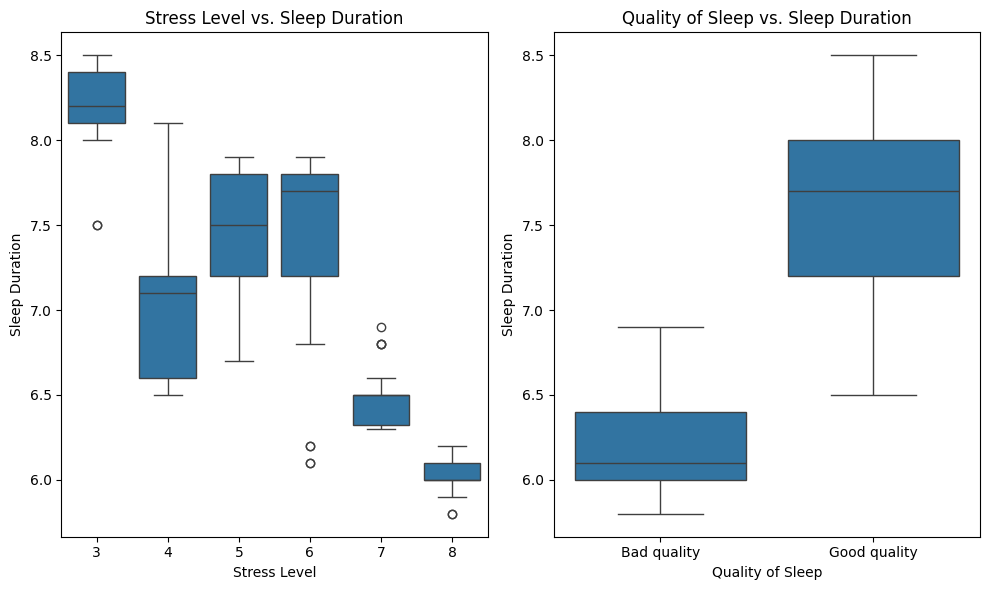

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(x='Stress Level', y='Sleep Duration', data=df, ax=axes[0])
axes[0].set_title('Stress Level vs. Sleep Duration')

sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df, ax=axes[1])
axes[1].set_title('Quality of Sleep vs. Sleep Duration')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()
enc.fit(df)
enc.categories_

[array([5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.1,
        7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4,
        8.5]),
 array(['Bad quality', 'Good quality'], dtype=object),
 array([30, 32, 35, 40, 42, 45, 47, 50, 55, 60, 65, 70, 75, 80, 85, 90]),
 array([3, 4, 5, 6, 7, 8]),
 array(['Normal', 'Normal Weight', 'Obese', 'Overweight'], dtype=object),
 array(['115/75', '115/78', '117/76', '118/75', '118/76', '119/77',
        '120/80', '121/79', '122/80', '125/80', '125/82', '126/83',
        '128/84', '128/85', '129/84', '130/85', '130/86', '131/86',
        '132/87', '135/88', '135/90', '139/91', '140/90', '140/95',
        '142/92'], dtype=object),
 array([65, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84,
        85, 86])]

In [ ]:
encoded_df = enc.transform(df)

In [ ]:
df_encoded = pd.DataFrame(encoded_df, columns=df.columns)

In [ ]:
decoded_data = enc.inverse_transform(df_encoded)

In [ ]:
df_decoded = pd.DataFrame(decoded_data, columns=df.columns)

<Axes: >

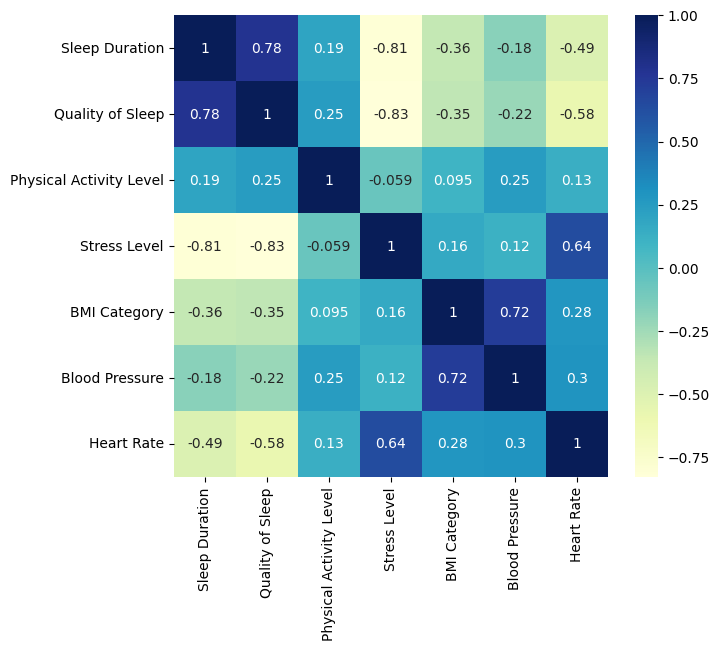

In [ ]:
plt.figure(figsize = (7, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='YlGnBu')

In [ ]:
df_encoded

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate
0,3.0,0.0,4.0,3.0,3.0,11.0,10.0
1,4.0,0.0,9.0,5.0,0.0,9.0,8.0
2,4.0,0.0,9.0,5.0,0.0,9.0,8.0
3,1.0,0.0,0.0,5.0,2.0,22.0,17.0
4,1.0,0.0,0.0,5.0,2.0,22.0,17.0
...,...,...,...,...,...,...,...
369,22.0,1.0,12.0,0.0,3.0,23.0,2.0
370,21.0,1.0,12.0,0.0,3.0,23.0,2.0
371,22.0,1.0,12.0,0.0,3.0,23.0,2.0
372,22.0,1.0,12.0,0.0,3.0,23.0,2.0


In [ ]:
x = df_encoded.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns=df_encoded.columns)
df_normalized

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate
0,0.115385,0.0,0.266667,0.6,1.000000,0.458333,0.555556
1,0.153846,0.0,0.600000,1.0,0.000000,0.375000,0.444444
2,0.153846,0.0,0.600000,1.0,0.000000,0.375000,0.444444
3,0.038462,0.0,0.000000,1.0,0.666667,0.916667,0.944444
4,0.038462,0.0,0.000000,1.0,0.666667,0.916667,0.944444
...,...,...,...,...,...,...,...
369,0.846154,1.0,0.800000,0.0,1.000000,0.958333,0.111111
370,0.807692,1.0,0.800000,0.0,1.000000,0.958333,0.111111
371,0.846154,1.0,0.800000,0.0,1.000000,0.958333,0.111111
372,0.846154,1.0,0.800000,0.0,1.000000,0.958333,0.111111


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_normalized.drop(columns='Quality of Sleep')

In [ ]:
y = df_normalized['Quality of Sleep']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
decisiontree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
decisiontree = decisiontree.fit(X_train, y_train)

In [ ]:
result_decisiontree = decisiontree.predict(X_test)
print(classification_report(y_test, result_decisiontree))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        35
         1.0       1.00      0.97      0.99        78

    accuracy                           0.98       113
   macro avg       0.97      0.99      0.98       113
weighted avg       0.98      0.98      0.98       113



In [ ]:
accuracy_score = accuracy_score(y_test, result_decisiontree)
accuracy_score

0.9823008849557522

In [ ]:
error_rate = 1 - accuracy_score
error_rate

0.017699115044247815

In [ ]:
confusion_matrix = confusion_matrix(y_test, result_decisiontree)
confusion_matrix

array([[35,  0],
       [ 2, 76]])

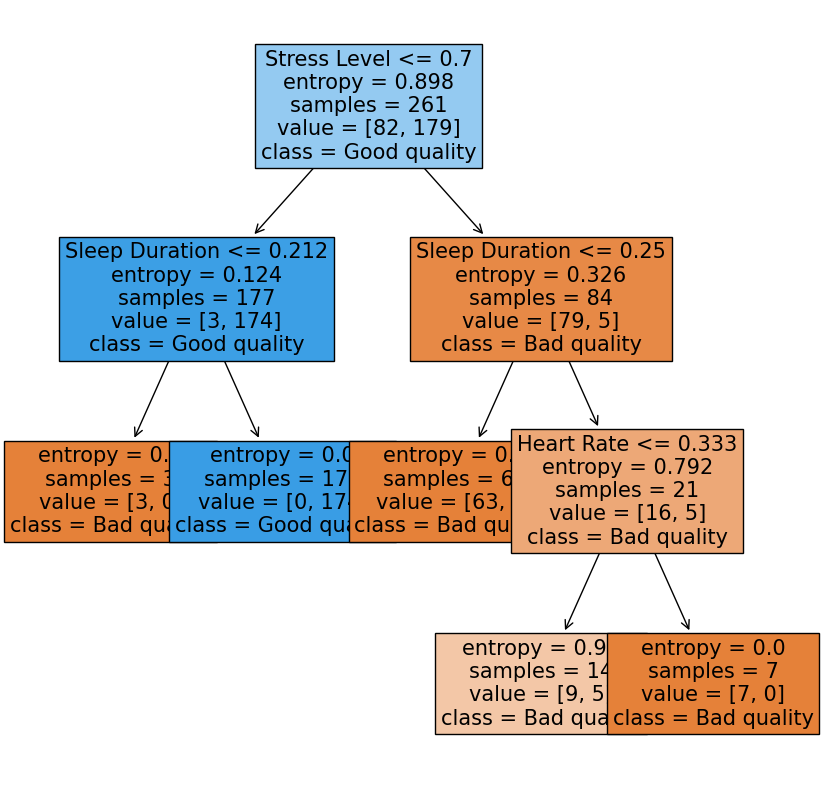

In [ ]:
plt.figure(figsize=(10,10))

plot_tree = tree.plot_tree(
    decisiontree,
    filled=True,
    feature_names=X.columns,
    class_names=df_decoded['Quality of Sleep'].unique(),
    max_depth=3,
    fontsize=15)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
x = df_normalized.drop(columns='Quality of Sleep')

In [ ]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)

kmeans5.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 6.11378205e-01,  7.46296296e-01,  3.83333333e-01,
         3.70370370e-02,  3.47222222e-01,  1.63194444e-01],
       [ 2.10150674e-01,  5.40893471e-01,  8.30927835e-01,
         9.72508591e-01,  7.50429553e-01,  4.13516609e-01],
       [ 6.17906683e-01,  6.13114754e-01,  9.18032787e-02,
         9.89071038e-01,  8.94125683e-01,  1.00182149e-01],
       [ 1.25506073e-01,  5.96491228e-02,  9.73684211e-01,
         4.38596491e-02,  3.82675439e-01,  3.12865497e-01],
       [ 9.50226244e-01,  1.96078431e-02, -1.66533454e-16,
         2.22044605e-16,  3.67647059e-01,  1.30718954e-02]])

Text(0, 0.5, 'Stress Level')

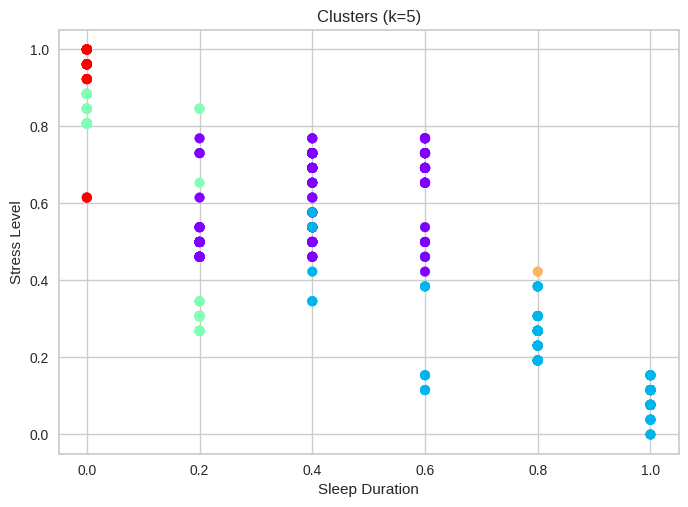

In [ ]:
plt.scatter(x['Stress Level'], x['Sleep Duration'], c=y_kmeans5, cmap='rainbow')
plt.title('Clusters (k=5)')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

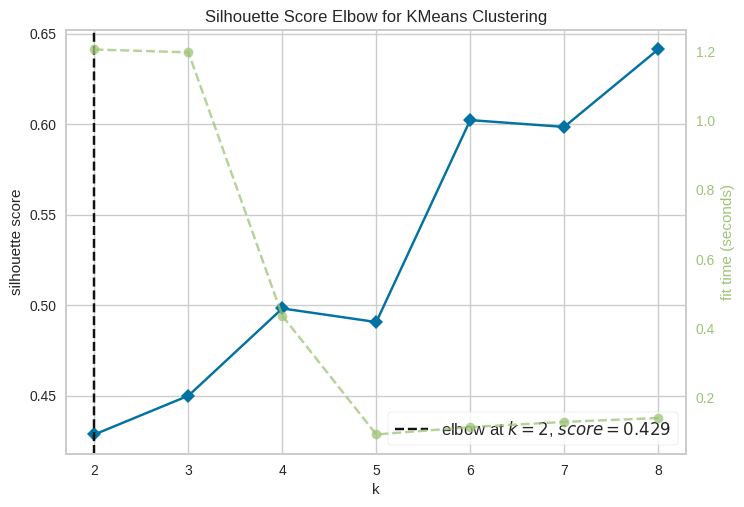

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(KMeans(), k=(2,9), timings=True, metric='silhouette')

visualizer.fit(x)
visualizer.show()

In [ ]:
# Testa o kmeans com o k que o elbow indicou
kmeans2 = KMeans(n_clusters=6)
y_kmeans2 = kmeans2.fit_predict(x)

kmeans2.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 2.54578755e-01,  3.03703704e-01,  7.58730159e-01,
         9.68253968e-01,  6.36904762e-01,  3.84479718e-01],
       [ 9.50226244e-01,  1.96078431e-02, -1.66533454e-16,
         2.22044605e-16,  3.67647059e-01,  1.30718954e-02],
       [ 6.11378205e-01,  7.46296296e-01,  3.83333333e-01,
         3.70370370e-02,  3.47222222e-01,  1.63194444e-01],
       [ 1.02163462e-01,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  9.58333333e-01,  4.44444444e-01],
       [ 1.25506073e-01,  5.96491228e-02,  9.73684211e-01,
         4.38596491e-02,  3.82675439e-01,  3.12865497e-01],
       [ 6.15384615e-01,  6.14814815e-01,  1.01587302e-01,
         9.78835979e-01,  8.97486772e-01,  1.23456790e-01]])

In [ ]:
kmeans2.labels_

array([0, 4, 4, 0, 0, 0, 0, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       2, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 5, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       5, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 0, 5, 0, 0, 5, 0,
       0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0,
       5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,

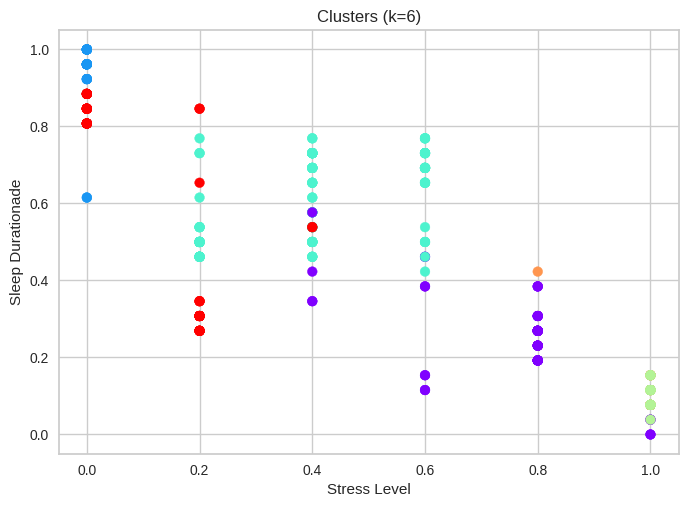

In [ ]:
plt.scatter(x['Stress Level'], x['Sleep Duration'], c=y_kmeans2, cmap='rainbow')
plt.title('Clusters (k=6)')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Durationade')
plt.legend()

In [ ]:
tr